<a href="https://colab.research.google.com/github/Kedree/DataAnalysisUMF/blob/main/Midterm/Used_Car_Midterm_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Car Midterm Data Visualization Project**
#### Kedree Proffitt, Landon Rollins, Zac Whitney

## **Description of Goals**
By analyzing  used car data we can infer many great insights into the used car market and perhaps discover what can make cars sell for more than others.

The first step is of course data cleaning.

Imports:

In [ ]:
import pandas as pd # Imports
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  

# Unused but common imports below, delete when submitting work
#!pip install seaborn_qqplot
#!pip install joypy
#!pip install squarify
#import sys
#import plotly.express as px
#import joypy as jp
#from matplotlib import cm
#from statsmodels.graphics.mosaicplot import mosaic
#from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
#from scipy.stats import norm
#!git clone https://github.com/mparker2/seaborn_sinaplot.git
#sys.path.append('/content/seaborn_sinaplot')
#from seaborn_sinaplot import sinaplot

## **Data Cleaning**

```Kedree```

The data was too bloated to upload so it had to be cleaned in R instead of python, see the R code by checking the github, for a point of reference the data was cleaned from 1.25 GB as a 426,880 x 26 to a 39 MB 375,661 x 16 by getting rid of useless columns and removing outliers like 9,999,999 on odometers. 🎉

Side note I also used Excel's data filtering to find weird responses, deleting buses, salvage cars, turning "others" into blanks, etc.

The new size is 375,249 x 16.

In [ ]:
#Kedree
usedCar = pd.read_csv('/content/drive/MyDrive/DATA/vehiclesClean3.csv') # Taking our used car data and storing it for use
usedCar.head(5) # Confirmation of success

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,33590.0,2014,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923,clean,NaN,NaN,NaN,pickup,white,al,2021-05-04T12:31:18-0500
1,22590.0,2010,chevrolet,silverado 1500,good,8.0,gas,71229,clean,NaN,NaN,NaN,pickup,blue,al,2021-05-04T12:31:08-0500
2,39590.0,2020,chevrolet,silverado 1500 crew,good,8.0,gas,19160,clean,NaN,NaN,NaN,pickup,red,al,2021-05-04T12:31:25-0500
3,30990.0,2017,toyota,tundra double cab sr,good,8.0,gas,41124,clean,NaN,NaN,NaN,pickup,red,al,2021-05-04T10:41:31-0500
4,15000.0,2013,ford,f-150 xlt,excellent,6.0,gas,128000,clean,automatic,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500


In [ ]:
usedCar.info()#Kedree

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375249 entries, 0 to 375248
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         375249 non-null  float64
 1   year          375249 non-null  int64  
 2   manufacturer  361941 non-null  object 
 3   model         371202 non-null  object 
 4   condition     232870 non-null  object 
 5   cylinders     221544 non-null  float64
 6   fuel          345851 non-null  object 
 7   odometer      375249 non-null  int64  
 8   title_status  368692 non-null  object 
 9   transmission  313533 non-null  object 
 10  drive         261763 non-null  object 
 11  size          105152 non-null  object 
 12  type          295918 non-null  object 
 13  paint_color   266336 non-null  object 
 14  state         375249 non-null  object 
 15  posting_date  375249 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 45.8+ MB


```Kedree```

Data looks good, see the R code in the github for cleaning process!

Many of the null cylinders are just missing data but a portion are electric cars!

## **Data Exploration**

### Basic Statistics

```Kedree```

In [ ]:
usedCar.describe()

,price,year,cylinders,odometer
count,375249.000000,375249.000000,221544.000000,375249.000000
mean,19187.030801,2011.325472,5.964346,94079.499682
std,15070.778744,8.458822,1.593545,65052.768175
min,201.000000,1951.000000,3.000000,42.000000
25%,7575.000000,2008.000000,4.000000,39649.000000
50%,15889.000000,2013.000000,6.000000,88310.000000
75%,27990.000000,2017.000000,8.000000,136000.000000
max,299991.000000,2022.000000,12.000000,747776.000000


```Kedree```

The price ranges from \$200 to \$299,991 when checking the data it shows that its like 4 blue lamborghini huracans and one random chrysler, good enough! The lambo seems to be repeat listings probably to different craigslist pages / counts. It shouldn't throw things off too much and this process is probably to diffiuclt to fix for what its worth. The averages seem a lot better when cleaned, average car year is 2011, average odometer is about 94,000 miles, these line up! $19,000 average car feels a little low but it makes sense for craigslist mostly used cars.

Average cylinders is 5.96, seems a bit high to me but I'm not a car guy, there are some electric cars and missing data as well that have blanks!

In [ ]:
len(usedCar.loc[usedCar['cylinders'].notnull()])#Kedree

221544

### Correlation Matrix
```Kedree```

In [ ]:
#Kedree
carCorr = usedCar.corr() # Getting the data's correlation matrix
carCorr # show the corr matrix

,price,year,cylinders,odometer
price,1.000000,0.383196,0.343814,-0.490578
year,0.383196,1.000000,-0.158831,-0.378240
cylinders,0.343814,-0.158831,1.000000,0.035710
odometer,-0.490578,-0.378240,0.035710,1.000000


[Text(0, 0, 'price'),
 Text(0, 0, 'year'),
 Text(0, 0, 'cylinders'),
 Text(0, 0, 'odometer')]

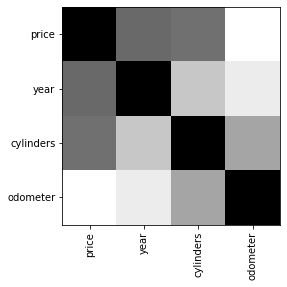

In [ ]:
#Kedree
plt.figure() # Create a figure to be changed
plt.imshow(carCorr, cmap='binary', interpolation='nearest') # make the figure a corr matrix
ax = plt.gca() # get the current axis
plt.xticks(rotation=90) # rotate the x ticks labels by 90
ax.set_xticks(range(len(carCorr.columns))) # The xticks are from 0 to the number of columns-1
ax.set_xticklabels(carCorr.columns) # then set the labels of the created ticks

ax.set_yticks(range(len(carCorr.columns))) # repeat for y the exact same as it is a corr matrix
ax.set_yticklabels(carCorr.columns)

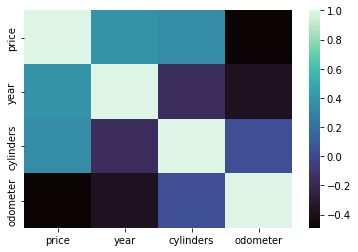

In [ ]:
#Kedree
sns.heatmap(carCorr, cmap='mako') # wow this is a lot easier and nicer!

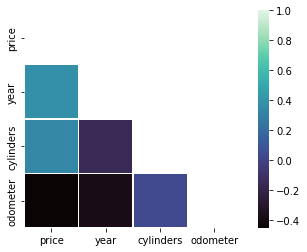

In [ ]:
#Kedree
mask = np.zeros_like(carCorr, dtype=bool) # I think this defines which squares to hide?
mask[np.triu_indices_from(mask)] = True # And this hides them?
sns.heatmap(carCorr, mask=mask, cmap='mako', vmin=-0.45, vmax=1, square=True, linewidths=.5) # this makes the sns heatmap with the mask, my cmap color of mako, can mess around with vmax and min, square makes it look pretty and linewidth is ditto
# Interesting notes here, Selling + Year, mileage + year, KM - Year, Power + Price, engine + km driven, seats + km driven, engine - mileage, power + engine, seats + engine, power + seats A LOT TO WORK WITH
# Most important for the theme of this project is the selling price row and col

## Data  Visualization
### Basic Plots
```Kedree```

<Figure size 432x288 with 0 Axes>

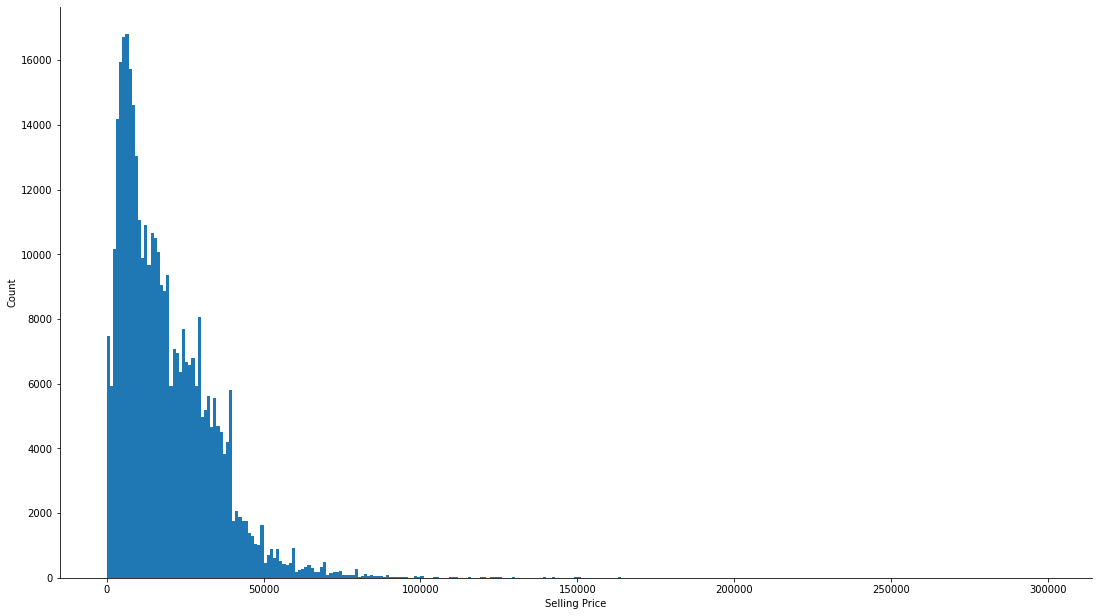

In [ ]:
# Kedree
plt.figure()
fig, ax = plt.subplots()

histX = usedCar['price']
bins = range(0, 300000, 1000)

ax = plt.hist(histX, bins)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax.set_ylabel("Count")
ax.set_xlabel("Selling Price")
plt.show()

<Figure size 432x288 with 0 Axes>

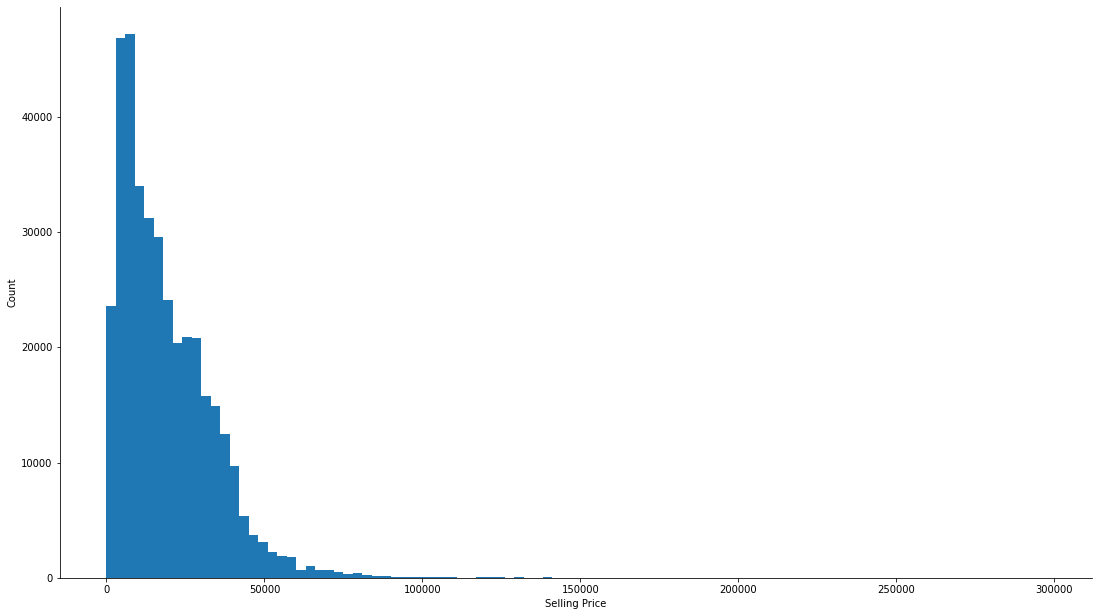

In [ ]:
# Kedree
plt.figure()
fig, ax = plt.subplots()

histX = usedCar['price']
bins = range(0, 300000, 3000)

ax = plt.hist(histX, bins)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax.set_ylabel("Count")
ax.set_xlabel("Selling Price")
plt.show()

<Figure size 432x288 with 0 Axes>

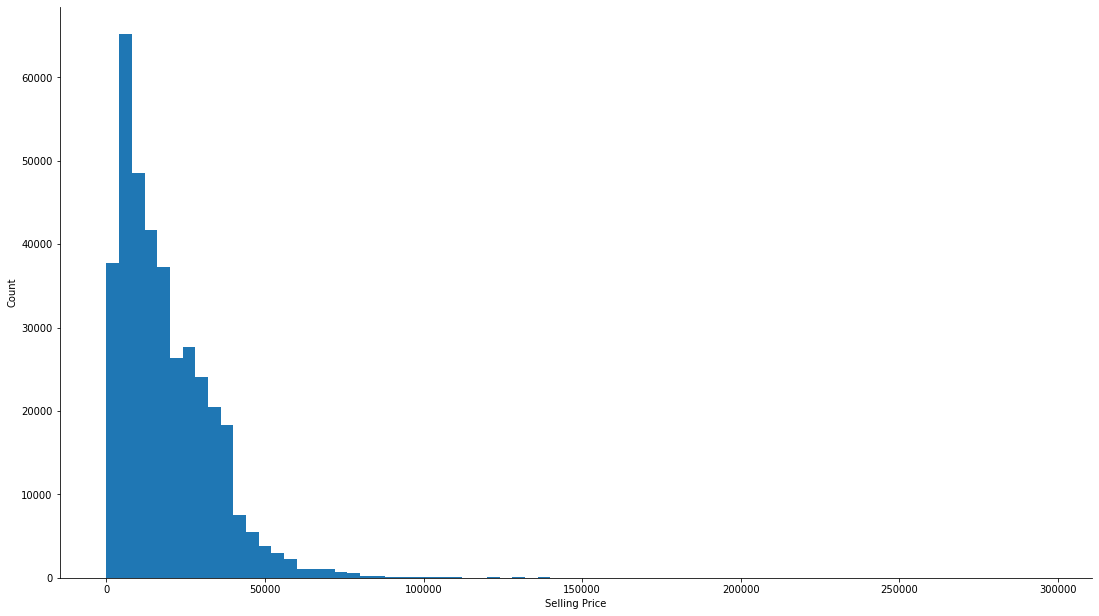

In [ ]:
# Kedree
plt.figure()
fig, ax = plt.subplots()

histX = usedCar['price']
bins = range(0, 300000, 4000)

ax = plt.hist(histX, bins)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax.set_ylabel("Count")
ax.set_xlabel("Selling Price")
plt.show()

<Figure size 432x288 with 0 Axes>

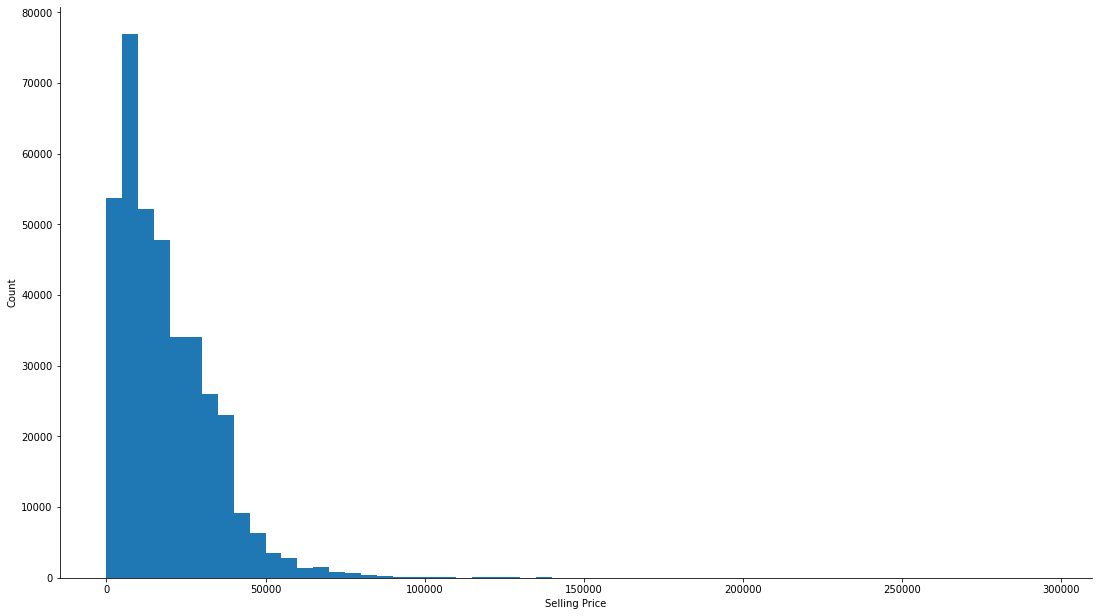

In [ ]:
# Kedree
plt.figure()
fig, ax = plt.subplots()

histX = usedCar['price']
bins = range(0, 300000, 5000)

ax = plt.hist(histX, bins)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax.set_ylabel("Count")
ax.set_xlabel("Selling Price")
plt.show()

<Figure size 432x288 with 0 Axes>

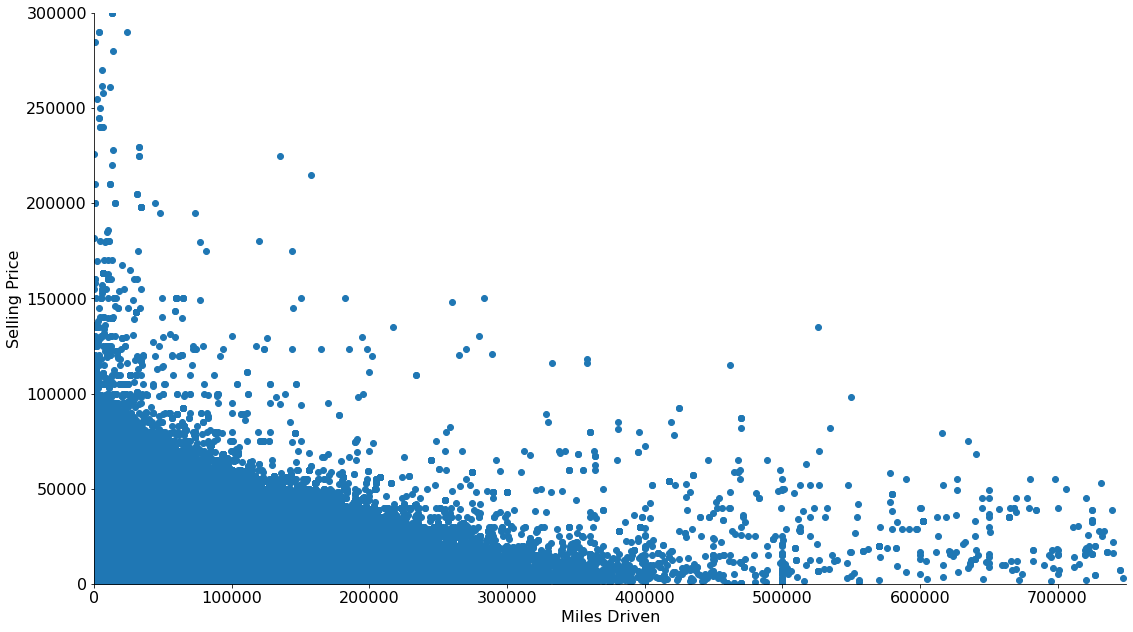

In [ ]:
# Kedree
plt.figure()
fig, ax = plt.subplots()

y = usedCar['price']
x = usedCar['odometer']

ax = plt.scatter(x, y)
plt.ylim(0, 300000)
plt.xlim(0, 750000)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax.set_ylabel("Selling Price")
ax.set_xlabel("Miles Driven")
plt.show()

```Kedree```



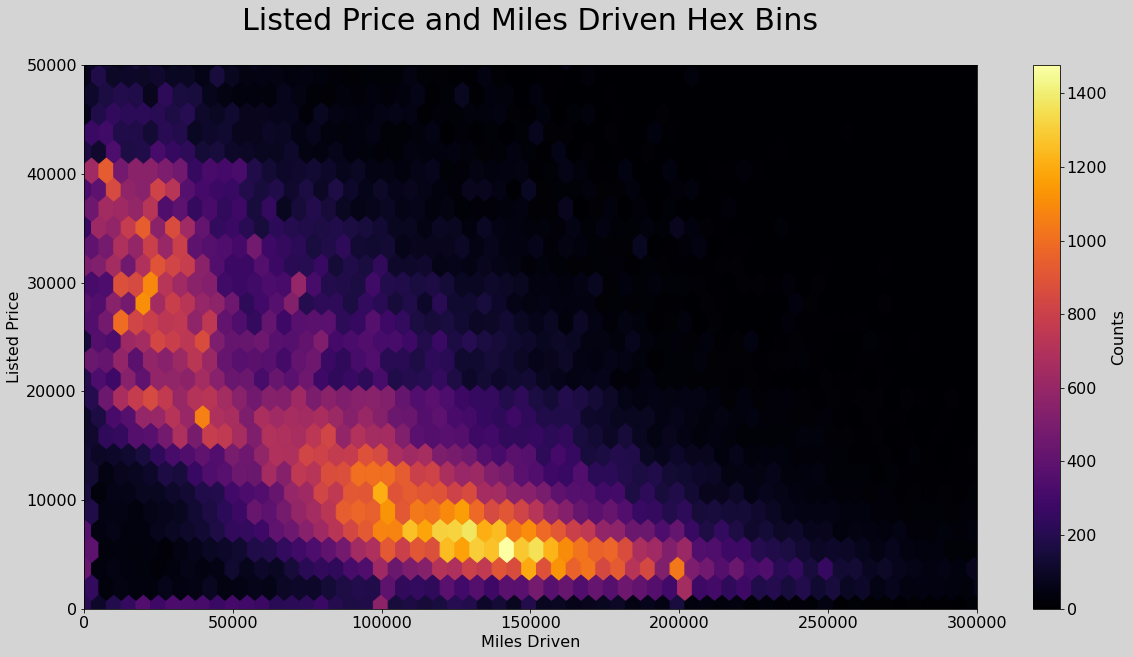

In [ ]:
y = usedCar['price']
x = usedCar['odometer']

plt.hexbin(x, y, gridsize = 150, cmap ='inferno') # Make a hexbin with the same axis as above, gridsize 150 was done through trial and error, inferno chosen because it sounds dope
plt.title('Listed Price and Miles Driven Hex Bins', fontdict={'fontsize': 30}, pad=35) # Title the piece, set the font size to 30 and the distance between the title and plot to arbitrary value 35 so it looks nice

plt.ylim(0, 50000) # Set miles driven limit
plt.xlim(0, 300000) # Set listed price limit

ax = plt.gca()

ax.set_ylabel("Listed Price") # Label the y axis
ax.set_xlabel("Miles Driven") # Label the x axis

ax.set_facecolor([0, 0, 0]) # Sets the background color of the plot to black to hide some of the white space

#ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.d')) # Prevents it from using power notation 1e7 etc.
#ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.d')) # Prevents it from using power notation 1e7 etc.
#ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.d')) # Prevents it from using power notation 1e7 etc., can be alterted like %.2f for decimals

fig = plt.gcf()

fig.set_size_inches(20, 10) # Makes big

plt.rcParams.update({'font.size': 16}) # Changes the axis font sizes

fig.patch.set_facecolor([.83, .83, .83]) # Set the figure background color to light grey for the pretty
plt.colorbar(label='Counts') # Make a colorbar legend and Label the colorbar

plt.show() # Release the plot

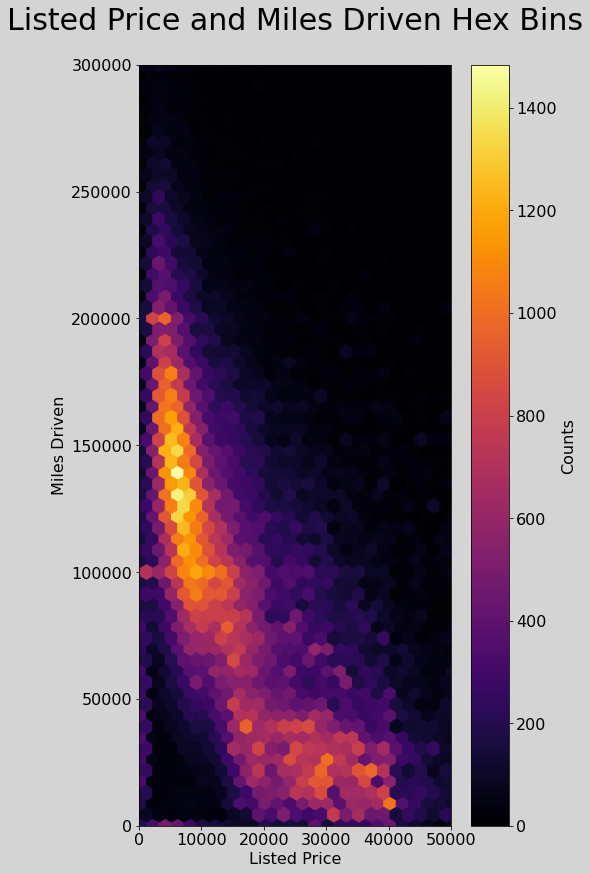

In [ ]:
x = usedCar['price'] # SWAPPED THE AXIS
y = usedCar['odometer']

plt.hexbin(x, y, gridsize = 150, cmap ='inferno') # Make a hexbin with the same axis as above, gridsize 150 was done through trial and error, inferno chosen because it sounds dope
plt.title('Listed Price and Miles Driven Hex Bins', fontdict={'fontsize': 30}, pad=35) # Title the piece, set the font size to 30 and the distance between the title and plot to arbitrary value 35 so it looks nice

plt.xlim(0, 50000) # Set miles driven limit
plt.ylim(0, 300000) # Set listed price limit

ax = plt.gca()

ax.set_xlabel("Listed Price") # Label the y axis
ax.set_ylabel("Miles Driven") # Label the x axis

ax.set_facecolor([0, 0, 0]) # Sets the background color of the plot to black to hide some of the white space

#ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.d')) # Prevents it from using power notation 1e7 etc.
#ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.d')) # Prevents it from using power notation 1e7 etc.
#ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.d')) # Prevents it from using power notation 1e7 etc., can be alterted like %.2f for decimals

fig = plt.gcf()

fig.set_size_inches(7, 14) # Makes big

plt.rcParams.update({'font.size': 16}) # Changes the axis font sizes

fig.patch.set_facecolor([.83, .83, .83]) # Set the figure background color to light grey for the pretty
plt.colorbar(label='Counts') # Make a colorbar legend and Label the colorbar

plt.show() # Release the plot

```Kedree```

Notes for coming back delete later



*   Make grouping plots, either the bridge type one or def the pie charts disguised as other types of plots as most of our data is categorical this is important, always include average selling price and standard deviation for the categories, maybe HW3's plots could be used IDK I NEED HELP
*   Do some region analysis
*   Forgot the third one lol just be good at data vis

